In [3]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt

from utils.table_tools import read_gt_table

%matplotlib inline

In [4]:
rgb_colors, _ = read_gt_table('gt_colors.csv')

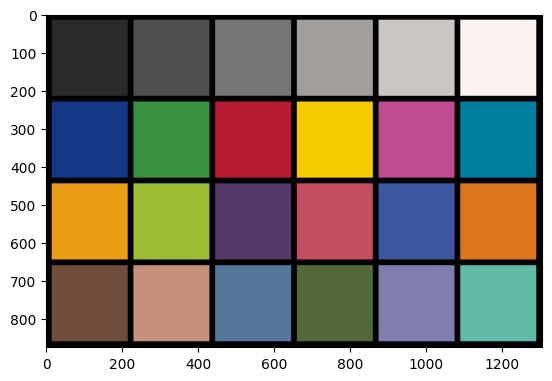

In [28]:
tab_size = (6, 4)
cell_size = 200
space_size = 15

w = tab_size[0] * (cell_size + space_size) + space_size
h = tab_size[1] * (cell_size + space_size) + space_size

res_table = np.zeros((h, w, 3), dtype=np.uint8)

for i in range(tab_size[0]):
    for j in range(tab_size[1]):
        cell_x = i * cell_size + (i + 1) * space_size
        cell_y = j * cell_size + (j + 1) * space_size
        
        color = (tab_size[1] - j - 1) * tab_size[0] + tab_size[1] - i + 1
        
        res_table[cell_y:cell_y+cell_size, cell_x:cell_x+cell_size] = rgb_colors[color]
        
assert cv2.imwrite('data/table_scheme.png', cv2.cvtColor(res_table, cv2.COLOR_RGB2BGR)), 'Table save'

plt.plot(figsize=(18, 14))
plt.imshow(res_table)
plt.show()